# NumPy

* NumPy, che sta per Numerical Python, è fondamentale per il calcolo numerico in Python.
* Progettato per il calcolo scientifico ed è ampiamente utilizzato per l'analisi dei dati grazie alla sua capacità di gestire in modo efficiente array e matrici di grandi dimensioni e multidimensionali.
* Costituisce la base per molte altre librerie di data science in Python, tra cui Pandas, grazie alla sua velocità ed efficienza nei calcoli numerici.
* Alcuni casi d'uso specifici di NumPy per l'analisi dei dati:
    * Operazioni sugli array
    * Algebra lineare
    * Funzioni statistiche
    * Generazione di numeri casuali
    
Per maggiori informazioni su NumPy, consulta la documentazione ufficiale [qui](https://numpy.org/doc/1.26/).


In [16]:
# Install package
%conda install numpy

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/miniconda3/envs/labPython

  added / updated specs:
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    contourpy-1.3.1            |  py312h48ca7d4_0         264 KB
    matplotlib-base-3.9.2      |  py312h7ef442a_1         7.8 MB
    numpy-2.2.2                |  py312h7f4fdc5_0          12 KB
    numpy-base-2.2.2           |  py312he047099_0         6.7 MB
    setuptools-72.1.0          |  py312hca03da5_0         2.9 MB
    ------------------------------------------------------------
                                           Total:        17.6 MB

The following packages will be UPDATED:

  contourpy                           1.2.0-py312h48ca7d4_0 --> 1.3.1-py312h48ca7d4_0 
  matplotlib-base                     3.9.2-py312h2df2da3_0 --> 3.9.2-py3

In [5]:
# Import Package
import numpy as np

### numpy vs statistics

Iniziamo creando un array fittizio e confrontiamo i tempi di esecuzione per fare la media con statistics e numpy

In [1]:
# creo una lista di 1,000,000 numeri random tra 50,000 e 150,000
import random

lista_numeri = [random.randint(50000, 150000) for _ in range(1000000)]


In [2]:
import statistics

In [3]:
%%timeit

statistics.mean(lista_numeri)

88.7 ms ± 4.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit

np.mean(lista_numeri)

22.2 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## ndarray

La struttura dati fondamentale di NumPy è l’ndarray: un array n-dimensionale omogeneo che consente di rappresentare e manipolare insiemi di dati numerici in modo veloce ed efficiente. 

Il bello è che la maggior parte delle operazioni sembrano esattamente le stesse, indipendentemente dal numero di dimensioni di un array. Ma i casi 1D e 2D sono un po' speciali. 


### Numpy Array vs. Python List
- Entrambi servono come contenitori 
- Più compatti, soprattutto quando le dimensioni sono più di una
- Più veloci delle liste quando l’operazione può essere vettorizzata
- Generalmente omogenei: possono funzionare velocemente solo con elementi di un unico tipo


## Operazioni sugli Array

* Creazione di un array: **da lista o generato**
* Operazioni di base: `+`, `-`, `/`, `*` eseguite elemento per elemento
* Slicing: **`array[1:3]`**
* Indicizzazione booleana: **`array[array > 0]`**



### Creazione di un array
1. A partire da una lista di python usando np.array(lista)
2. Usando delle funzioni di numpy come np.arrange, np.linspace, np.ones, np.random.rand 


In [7]:
# Esempio: Un array di una lista 
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

Quando crei un vettore in questo modo, **NumPy cercherà di inferire automaticamente il tipo di dati** da memorizzare nel vettore, basandosi sui valori forniti.  

Puoi verificare quale tipo di dato è stato assegnato al vettore accedendo all'attributo `.dtype` del tuo array.


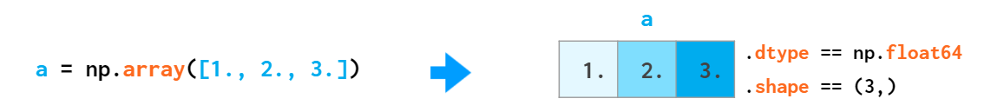

In [8]:
np.array([1, 2.2, 3, 4, 5]).dtype

dtype('float64')

In [9]:
a = np.array([1, 2, 3, 4, 5])
a.dtype

dtype('int64')

In [10]:
np.array([1, 2, 3, 4, "s"]).dtype

dtype('<U21')

Il prefisso U indica che il tipo di dato è una stringa Unicode.
Il numero 21 indica la lunghezza massima della stringa in caratteri (21 caratteri in questo caso)

Perché NumPy ha scelto U21?

NumPy cerca di assegnare un unico tipo di dato all'intero array. Dato che uno degli elementi è una stringa ("s"), NumPy converte tutti gli altri elementi (numeri interi) in stringhe per mantenere uniformità.
Il valore massimo della lunghezza delle stringhe nel vettore determina il numero (21 in questo caso, ma può variare).

Infatti, esiste una gerarchia dei tipi di dati, in cui un tipo più in basso nella gerarchia può sempre essere convertito in uno più alto, ma non viceversa.

Questa gerarchia è la seguente:

**Booleano → Intero → Virgola mobile (float) → Stringa**

In [11]:
# posso esplicitare il tipo che voglio nel mio array
as_a_float = np.array([1, 2], dtype="float")

In NumPy ci sono due funzioni per l'inizializzazione di array con una sequenza monotona:

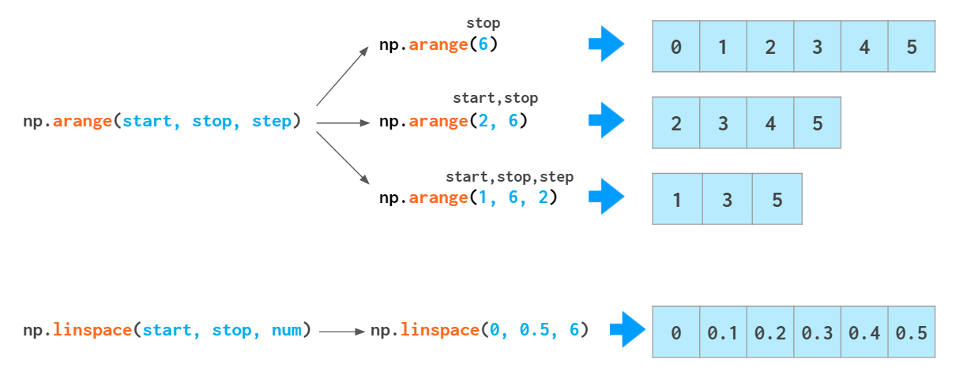

In [15]:
# Esempio di generazione di array
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

La funzione arange è sensibile al tipo: se si forniscono int come argomenti, verranno generati int, mentre se si forniscono float verranno generati float.

Linspace è immune agli errori di arrotondamento e genera sempre il numero di elementi richiesti, però conta i punti, non gli intervalli, quindi l'ultimo argomento è sempre più uno rispetto a quello che normalmente penseresti.

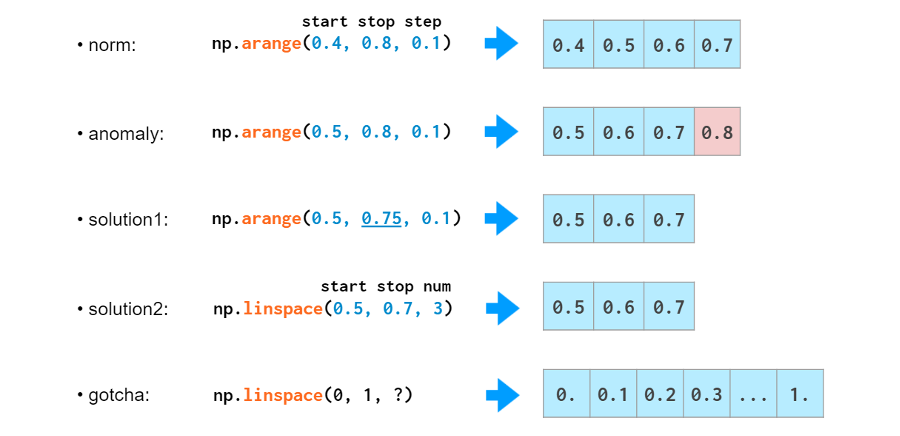

## Nota bene
Gli array NumPy non possono crescere come un elenco Python: non viene riservato alcuno spazio alla fine dell'array per facilitare aggiunte rapide.

Quindi è una pratica comune far crescere un elenco Python e convertirlo in un array NumPy quando è pronto o preallocare lo spazio necessario con np.zeros o np.empty:


In [28]:
# Creare un array di zeri:
zero_3d = np.zeros((3))
print(zero_3d)

[0. 0. 0.]


Spesso è necessario creare un array vuoto che corrisponda a quello esistente per forma e tipo di elementi:

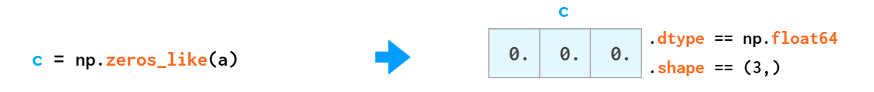

In [29]:
c = np.zeros_like(a)
c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Ci sono varie funzioni che creano un array riempito con un valore costante e la loro una controparte _like:

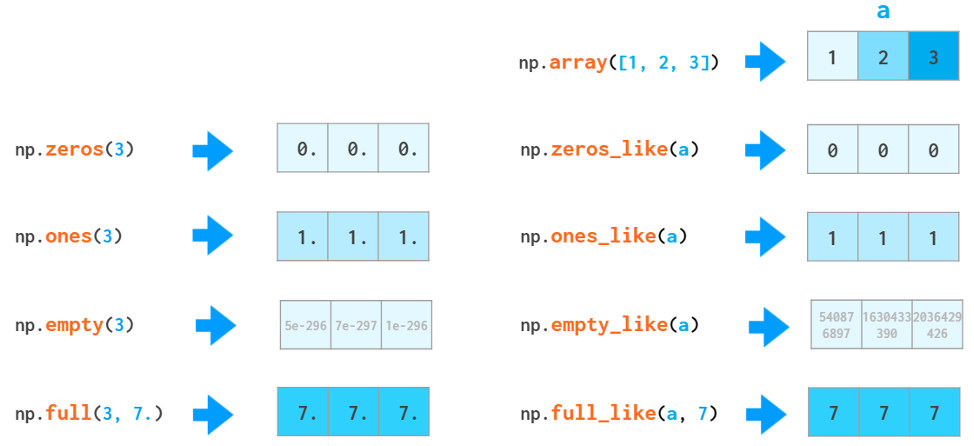

### Operazioni di base

Applicazione di operazioni matematiche all'intero array.


#### Addizione, Sottrazione, Divisione, Moltiplicazione

In [17]:
[1,2,3] * 2 

[1, 2, 3, 1, 2, 3]

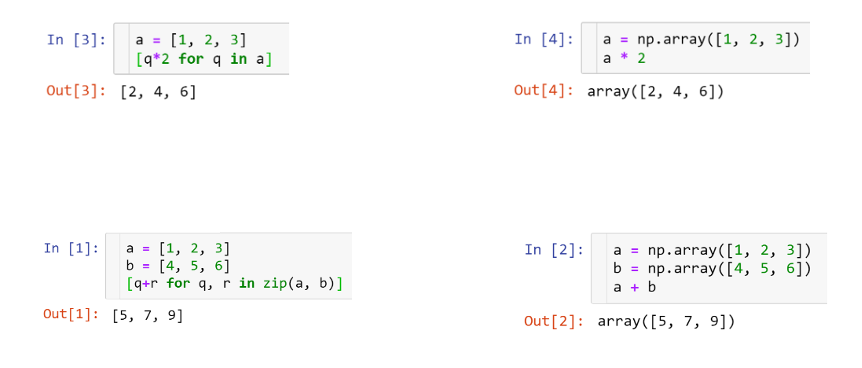

In [ ]:
a = np.array([1,2,3,4,5])
a_più_uno = a + 1
a_meno_uno  = a  - 1
a_diviso_due = a/2
a_per_due = a*2
a_più_uno, a_meno_uno, a_diviso_due, a_per_due  

(array([2, 3, 4, 5, 6]),
 array([0, 1, 2, 3, 4]),
 array([0.5, 1. , 1.5, 2. , 2.5]),
 array([ 2,  4,  6,  8, 10]))

### Slicing

Lo slicing funzione come per le liste e le stringhe

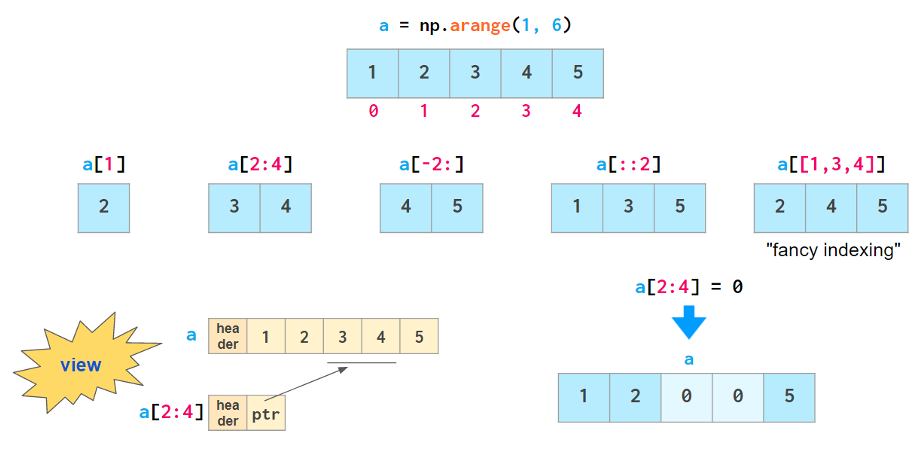

!!! A differenza delle liste gli array non possono essere copiati usando lo slicing

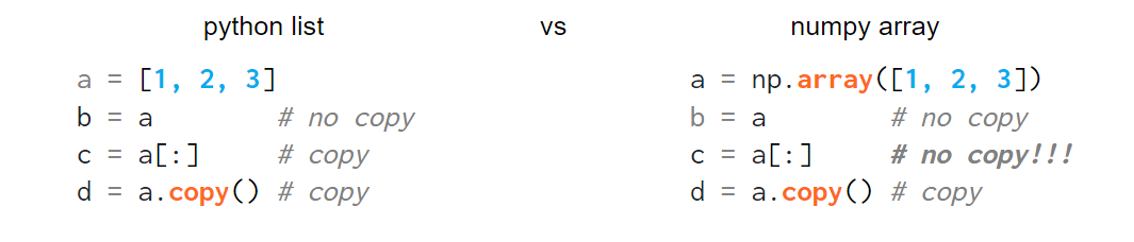

In [ ]:
# Example: Selecting the experience requirement for the second and third job listings.
b = a[1:3]
c = a[2:0:-1]
a, b, c

(array([1, 2, 3, 4, 5]), array([2, 3]), array([3, 2]))

Inoltre, tali assegnazioni non devono modificare la dimensione dell'array, quindi trucchi come

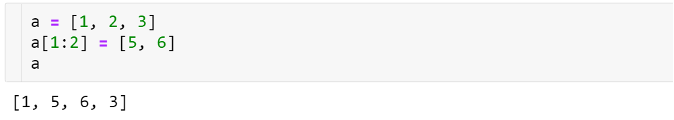

non funzionerà in NumPy: utilizzare invece np.insert, np.append, ecc.
